# Exercise 1 - Scraping the pokedex

## Step 1.1

In [931]:
#Use BeautifulSoup to extract all the table rows as a list. 
#Create an HTTP request for the page 
import requests
from bs4 import BeautifulSoup
url='https://pokemondb.net/pokedex/all'
import re

In [932]:
page = requests.get(url)
# Response code is returned
page

<Response [200]>

In [1182]:
page_soup = BeautifulSoup(page.text, 'html.parser')
page_soup=page_soup.prettify()

In [934]:
header_raw=page_soup.find_all(name="div", class_="sortwrap")
header=[]
for i in header_raw:
    header.append(i.text)

In [935]:
header

['#',
 'Name',
 'Type',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed']

In [936]:
body = page_soup.find_all('tbody')
print("Number of results: " + str(len(body)))
#page_list[0].find_all("tr")
content=[]
for each in page_soup.findAll(name = 'td'):
    content.append(each.contents)
rows=[content[i:i+10] for i in range(0, len(content), 10)]   
rows

Number of results: 1


[[[<span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Bulbasaur icon" data-src="https://img.pokemondb.net/sprites/sun-moon/icon/bulbasaur.png"></span></span>,
   <span class="infocard-cell-data">001</span>],
  [<a class="ent-name" href="/pokedex/bulbasaur" title="View pokedex for #001 Bulbasaur">Bulbasaur</a>],
  [<a class="type-icon type-grass" href="/type/grass">Grass</a>,
   <br/>,
   ' ',
   <a class="type-icon type-poison" href="/type/poison">Poison</a>],
  ['318'],
  ['45'],
  ['49'],
  ['49'],
  ['65'],
  ['65'],
  ['45']],
 [[<span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Ivysaur icon" data-src="https://img.pokemondb.net/sprites/sun-moon/icon/ivysaur.png"></span></span>,
   <span class="infocard-cell-data">002</span>],
  [<a class="ent-name" href="/pokedex/ivysaur" title="View pokedex for #002 Ivysaur">Ivysaur</a>],
  [<a class="type-icon type-grass" href="/type/grass">Grass</a>,
   <br/>,
   ' ',
   <a class="type-icon type

In [937]:
rows.append(header)
rowsfinal=[]
for row in rows:
    row=list(row)
    rowsfinal.append(row)

In [938]:
len(rowsfinal)

927

There are 927 rows in the extracted list, including the header

## Step 1.2

In [939]:
bulbasaur=rowsfinal[7]
string=''.join(str(e) for e in bulbasaur)
string

'[<span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Mega Charizard X icon" data-src="https://img.pokemondb.net/sprites/sun-moon/icon/charizard-mega-x.png"></span></span>, <span class="infocard-cell-data">006</span>][<a class="ent-name" href="/pokedex/charizard" title="View pokedex for #006 Charizard">Charizard</a>, <br/>, \' \', <small class="text-muted">Mega Charizard X</small>][<a class="type-icon type-fire" href="/type/fire">Fire</a>, <br/>, \' \', <a class="type-icon type-dragon" href="/type/dragon">Dragon</a>][\'634\'][\'78\'][\'130\'][\'111\'][\'130\'][\'85\'][\'100\']'

In [940]:
#The name of the pokemon
regexName = r'/pokedex/(.*)"\stitle'
Name = re.findall(regexName, string)
print(Name)

['charizard']


In [941]:
#The url of the pokemon
regexLink = r'href="(.*)"\stitle'
Link = re.findall(regexLink, string)
print(Link)

['/pokedex/charizard']


In [942]:
#The types of the pokemon
regexType1 = r'(?<=/type/).*>(\w+)(?=</a>\,)'
regexType2 =  r'(?<=/type/).*>(\w+)(?=</a>\])'
Type1 = re.findall(regexType1, string)
Type2 = re.findall(regexType2, string)
Type_List=Type1+Type2
Type=[' '.join(str(t) for t in Type_List)]
print(Type)

['Fire Dragon']


In [943]:
#The total points of the pokemon
regexTotal = r'(?<=\[\')(\d{3})'
Total = re.findall(regexTotal, string)
print(Total)

['634', '130', '111', '130', '100']


In [944]:
#The list of ID Number, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed of the pokemon
regexID = r'(\d+)</span>'
ID = re.findall(regexID, string)

regexNumeric = r'(?<=[\d+]\'\]\[\')(\d+)'
Numeric = re.findall(regexNumeric, string)

statistics=ID+Numeric
print(statistics)

['006', '78', '130', '111', '130', '85', '100']


## Step 1.3

In [945]:
#Define a function that takes in a row of the pokedex table and returns it as a DataFrame with a single row. 
#Create a single DataFrame by appending these rows. 
def pokedex(rowsfinal):
    import pandas as pd
    statistics=[]
    Name=[]
    Link=[]
    Type=[]
    Total=[]
    regexName = r'/pokedex/(.*)"\stitle'
    regexLink = r'href="(.*)"\stitle'
    regexType1 = r'(?<=/type/).*>(\w+)(?=</a>\,)'
    regexType2 =  r'(?<=/type/).*>(\w+)(?=</a>\])'
    regexTotal = r'(?<=\[\')(\d{3}?)'
    regexID = r'(\d+)</span>'
    regexNumeric = r'(?<=[\d+]\'\]\[\')(\d+)'
    for i in range(len(rowsfinal)-1):
        string=''.join(str(e) for e in rowsfinal[i])
        Name.append(re.findall(regexName, string))
        ID = re.findall(regexID, string)
        Numeric = re.findall(regexNumeric, string)
        statistics.append(ID+Numeric)
        Link.append(re.findall(regexLink, string))
        Type1 = re.findall(regexType1, string)
        Type2 = re.findall(regexType2, string)
        Type_List=Type1+Type2
        Type.append([' '.join(str(t) for t in Type_List)])
        Total.append(re.findall(regexTotal, string)[0])
    df=pd.DataFrame((list(zip(statistics,Name,Link,Type,Total))))
    return df
        

In [946]:
df=pokedex(rowsfinal)
df.head()

,0,1,2,3,4
0,"[001, 45, 49, 49, 65, 65, 45]",[bulbasaur],[/pokedex/bulbasaur],[Grass Poison],318
1,"[002, 60, 62, 63, 80, 80, 60]",[ivysaur],[/pokedex/ivysaur],[Grass Poison],405
2,"[003, 80, 82, 83, 100, 100, 80]",[venusaur],[/pokedex/venusaur],[Grass Poison],525
3,"[003, 80, 100, 123, 122, 120, 80]",[venusaur],[/pokedex/venusaur],[Grass Poison],625
4,"[004, 39, 52, 43, 60, 50, 65]",[charmander],[/pokedex/charmander],[Fire],309


# Exercise 2 - Cleaning the Pokedex

## Step 2.1

In [947]:
# Add column names to the DataFrame. Convert strings to numeric where appropriate.
#Make the ID number the first column in the DataFrame if it is not already.
df.columns = ['statistics','Name','URL','Type','Total']


In [948]:
df['statistics']=df['statistics'].apply(', '.join)


In [949]:

df['Name'] = df['Name'].str.get(0)
df['URL'] = df['URL'].str.get(0)
df['Type'] = df['Type'].str.get(0)

In [950]:
df.head()

,statistics,Name,URL,Type,Total
0,"001, 45, 49, 49, 65, 65, 45",bulbasaur,/pokedex/bulbasaur,Grass Poison,318
1,"002, 60, 62, 63, 80, 80, 60",ivysaur,/pokedex/ivysaur,Grass Poison,405
2,"003, 80, 82, 83, 100, 100, 80",venusaur,/pokedex/venusaur,Grass Poison,525
3,"003, 80, 100, 123, 122, 120, 80",venusaur,/pokedex/venusaur,Grass Poison,625
4,"004, 39, 52, 43, 60, 50, 65",charmander,/pokedex/charmander,Fire,309


In [951]:
new = df['statistics'].str.split(",", n = 6, expand = True) 


In [952]:
df['ID Number']=new[0]
df['HP']=new[1]
df['Attack']=new[2]
df['Defense']=new[3]
df['Sp.Atk']=new[4]
df['Sp.Def']=new[5]
df['Speed']=new[6]

In [953]:
df=df.drop('statistics', axis=1) 

In [954]:
df['Total']=df['Total'].astype(float)
df['HP']=df['HP'].astype(float)
df['Attack']=df['Attack'].astype(float)
df['Defense']=df['Defense'].astype(float)
df['Sp.Atk']=df['Sp.Atk'].astype(float)
df['Sp.Def']=df['Sp.Def'].astype(float)
df['Speed']=df['Speed'].astype(float)

In [955]:
df=df.set_index('ID Number')


In [956]:
df.head()

,Name,URL,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
ID Number,,,,,,,,,,
001,bulbasaur,/pokedex/bulbasaur,Grass Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0
002,ivysaur,/pokedex/ivysaur,Grass Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0
003,venusaur,/pokedex/venusaur,Grass Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0
003,venusaur,/pokedex/venusaur,Grass Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0
004,charmander,/pokedex/charmander,Fire,309.0,39.0,52.0,43.0,60.0,50.0,65.0


## Step 2.2

In [957]:
#Create 18 dummy variables for each type of pokemon. 
import pandas as pd
dummy=df['Type'].str.get_dummies(sep=' ')

In [958]:

df1=pd.concat([df,dummy],axis=1)
len(df1.columns)

28

## Step 2.3

In [1181]:
# Remove duplicate values of pokemon based on the URL
df1.drop_duplicates(subset ="URL", 
                     keep = 'first', inplace = True) 
len(df1)

809

## Step 2.4

In [960]:
#Add a dummy variable to the DataFrame called "sample" that tags every 4th pokemon to be included in the sample
df1['sample']=(df1.index.astype('int64') % 4==0).astype('int64')

In [961]:
df1.head(12)

,Name,URL,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,sample
ID Number,,,,,,,,,,,,,,,,,,,,,
001,bulbasaur,/pokedex/bulbasaur,Grass Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,...,1,0,0,0,1,0,0,0,0,0
002,ivysaur,/pokedex/ivysaur,Grass Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,...,1,0,0,0,1,0,0,0,0,0
003,venusaur,/pokedex/venusaur,Grass Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,...,1,0,0,0,1,0,0,0,0,0
004,charmander,/pokedex/charmander,Fire,309.0,39.0,52.0,43.0,60.0,50.0,65.0,...,0,0,0,0,0,0,0,0,0,1
005,charmeleon,/pokedex/charmeleon,Fire,405.0,58.0,64.0,58.0,80.0,65.0,80.0,...,0,0,0,0,0,0,0,0,0,0
006,charizard,/pokedex/charizard,Fire Flying,534.0,78.0,84.0,78.0,109.0,85.0,100.0,...,0,0,0,0,0,0,0,0,0,0
007,squirtle,/pokedex/squirtle,Water,314.0,44.0,48.0,65.0,50.0,64.0,43.0,...,0,0,0,0,0,0,0,0,1,0
008,wartortle,/pokedex/wartortle,Water,405.0,59.0,63.0,80.0,65.0,80.0,58.0,...,0,0,0,0,0,0,0,0,1,1
009,blastoise,/pokedex/blastoise,Water,530.0,79.0,83.0,100.0,85.0,105.0,78.0,...,0,0,0,0,0,0,0,0,1,0


# Exercise 3 - Scraping Individual Pages

## Step 3.1

In [962]:
#Scrape the main image for Bulbasaur in a general way that could be applied to other pokemon pages by searching for
#the relevant tag and extracting the image URL
from IPython.display import Image
#Image('officialcharts_apr2019.png')

In [963]:
urlimage='https://pokemondb.net/pokedex/bulbasaur'
image = requests.get(urlimage)
# Response code is returned
image_soup = BeautifulSoup(image.text, 'html.parser')
image_soup.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Bulbasaur Pokédex: stats, moves, evolution &amp; locations | Pokémon Database\n  </title>\n  <link href="https://fonts.gstatic.com" rel="preconnect"/>\n  <link href="https://img.pokemondb.net" rel="preconnect"/>\n  <link href="/static/css/pokemondb-188cff66b0.css" rel="stylesheet"/>\n  <style>\n   .cell-barchart{width:100%;min-width:150px}.barchart-bar{height:.75rem;border-radius:4px;background-color:#a3a3a3;border:1px solid #737373;border-color:rgba(0,0,0,0.15)}.barchart-rank-1{background-color:#f34444}.barchart-rank-2{background-color:#ff7f0f}.barchart-rank-3{background-color:#ffdd57}.barchart-rank-4{background-color:#a0e515}.barchart-rank-5{background-color:#23cd5e}.barchart-rank-6{background-color:#00c2b8}\n.type-table th,.type-table td{padding:0;border:1px solid #f0f0f0}.cell-atkdef{font-size:.625rem;font-weight:normal;line-height:1}.type-cell{display:block;width:66px;height:28px;font-size:.625re

In [964]:
image_string=''.join(str(e) for e in image_soup.find_all('img'))
print(image_string)


<img alt="Bulbasaur artwork by Ken Sugimori" height="336" src="https://img.pokemondb.net/artwork/bulbasaur.jpg" width="360"/><img alt="Bulbasaur  sprite from Red &amp; Blue" class="img-fixed img-sprite-v1" src="https://img.pokemondb.net/sprites/red-blue/normal/bulbasaur.png"/><img alt="Bulbasaur  sprite from Silver" class="img-fixed img-sprite-v3" src="https://img.pokemondb.net/sprites/silver/normal/bulbasaur.png"/><img alt="Bulbasaur  sprite from Ruby &amp; Sapphire" class="img-fixed img-sprite-v5" src="https://img.pokemondb.net/sprites/ruby-sapphire/normal/bulbasaur.png"/><img alt="Bulbasaur  sprite from Diamond &amp; Pearl" class="img-fixed img-sprite-v8" src="https://img.pokemondb.net/sprites/diamond-pearl/normal/bulbasaur.png"/><img alt="Bulbasaur  sprite from Black &amp; White" class="img-fixed img-sprite-v11" src="https://img.pokemondb.net/sprites/black-white/normal/bulbasaur.png"/><img alt="Bulbasaur  sprite from X &amp; Y" class="img-fixed img-sprite-v13" src="https://img.poke

In [965]:
#Display image
image= re.findall('https://.*/.*/.*.jpg', image_string)
image[0]

'https://img.pokemondb.net/artwork/bulbasaur.jpg'

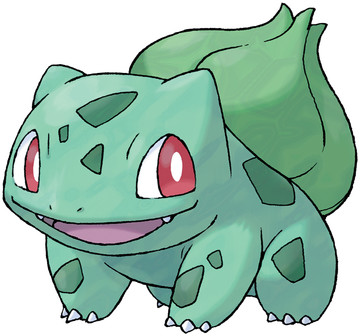

In [966]:
import requests
import IPython.display as Disp
Disp.Image(requests.get(image[0]).content)

## Step 3.2

In [967]:
#Extract the location table.
url='https://pokemondb.net/pokedex/bulbasaur'
tables = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text)

In [968]:
#Show the desired DataFrame for the locations table in your notebook.
tables[15]

,0,1
0,RedBlue,Pallet Town
1,Yellow,Cerulean City
2,GoldSilverCrystal,Trade/migrate from another game
3,RubySapphire,Trade/migrate from another game
4,FireRedLeafGreen,Pallet Town
5,Emerald,Trade/migrate from another game
6,DiamondPearlPlatinum,Trade/migrate from another game
7,HeartGoldSoulSilver,Pallet Town
8,BlackWhiteBlack 2White 2,Trade/migrate from another game
9,XY,Lumiose City


## Step 3.3

In [969]:
#Transpose the DataFrame such that each column is a video game and each row/cell is the location where you find Bulbasaur in that game. 
table=tables[15].T
table.columns = table.iloc[0]
table=table.drop(table.index[0])

In [970]:
table

,RedBlue,Yellow,GoldSilverCrystal,RubySapphire,FireRedLeafGreen,Emerald,DiamondPearlPlatinum,HeartGoldSoulSilver,BlackWhiteBlack 2White 2,XY,Omega RubyAlpha Sapphire,SunMoon,Ultra SunUltra Moon,Let's Go PikachuLet's Go Eevee
1,Pallet Town,Cerulean City,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Lumiose City,Trade/migrate from another game,Trade/migrate from another game,Route 2,"Cerulean City, Viridian Forest"


## Step 3.4

In [971]:
#Set up the pokeman route names
import time
samples=df1['Name'][df1['sample']==1]
route_names=list(map(lambda x:x.lower(),samples))
del route_names[-1]

In [976]:
#Extract the location table and transpose it for all the pokemon in the sample 
dfs = []
for route_name in route_names:
    print("Processing Route: " + route_name)
    url='https://pokemondb.net/pokedex/'+route_name
    tables = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text)
    tables=tables[-2].T
    tables.columns = tables.iloc[0]
    tables=tables.drop(tables.index[0])
    tables['Name']=route_name
    time.sleep(0.5)
    dfs.append(tables)
print("Finished")

Processing Route: charmander
Processing Route: wartortle
Processing Route: butterfree
Processing Route: pidgey
Processing Route: raticate
Processing Route: arbok
Processing Route: sandslash
Processing Route: nidoran-m
Processing Route: clefable
Processing Route: wigglytuff
Processing Route: gloom
Processing Route: venonat
Processing Route: meowth
Processing Route: mankey
Processing Route: poliwag
Processing Route: kadabra
Processing Route: machamp
Processing Route: tentacool
Processing Route: golem
Processing Route: slowbro
Processing Route: doduo
Processing Route: grimer
Processing Route: gastly
Processing Route: drowzee
Processing Route: voltorb
Processing Route: cubone
Processing Route: lickitung
Processing Route: rhydon
Processing Route: horsea
Processing Route: staryu
Processing Route: jynx
Processing Route: tauros
Processing Route: ditto
Processing Route: flareon
Processing Route: kabuto
Processing Route: articuno
Processing Route: dragonair
Processing Route: chikorita
Processing

In [1017]:
#Check if the the column 'XY' is in the DataFrame. If so, create a new DataFrame with only the name or URL for the pokemon and the 'XY' column. 
#Append that DataFrame to a list to concatenate with the other pokemon that have the XY location column. 
dfs1=[]
for df in dfs:
    if 'XY' in df.columns:
        dfs1.append(df[['Name','XY']])


In [1156]:
#Create a single DataFrame that contains the name or URL of the pokemon and the XY location.
#Append all the sample pokemon and their XY locations to a single DataFrame.
XY=pd.DataFrame()
XY=XY.append(dfs1,ignore_index=True)
XY.head()

,Name,XY
0,charmander,Lumiose City
1,wartortle,Evolve Squirtle
2,butterfree,Evolve Caterpie/Metapod
3,pidgey,"Route 2, 3"
4,raticate,Trade/migrate from another game


In [1157]:
len(XY)


141

# Exercise 4 - Analysis

## Step 4.1

In [1032]:
#Create a table that shows the average  attack and defense for each type. 
sampleDF=df1[df1['sample']==1]

In [1074]:
dummies=list(sampleDF.columns[10:28])
dummies

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [1132]:
pivot=[]
for dummy in dummies:
    pivot.append(sampleDF.pivot_table(values=['Attack','Defense'],columns=dummy,aggfunc='mean'))
pivot.head()

[Bug              0          1
 Attack   76.533333  72.272727
 Defense  72.655556  73.272727, Dark             0          1
 Attack   75.435897  93.714286
 Defense  72.564103  77.142857, Dragon           0          1
 Attack   74.414894  98.285714
 Defense  71.489362  89.285714, Electric          0          1
 Attack    76.088083  75.666667
 Defense   73.264249  61.111111, Fairy            0          1
 Attack   77.078947  60.083333
 Defense  72.505263  76.166667, Fighting          0          1
 Attack    74.162162  96.823529
 Defense   72.772973  72.176471, Fire             0          1
 Attack   75.542553  83.142857
 Defense  72.973404  69.357143, Flying           0          1
 Attack   76.721311  69.789474
 Defense  73.464481  65.578947, Ghost            0          1
 Attack   76.026178  76.818182
 Defense  72.738220  72.454545, Grass            0          1
 Attack   76.500000  72.545455
 Defense  73.388889  67.272727, Ground           0          1
 Attack   74.729730  90.647059
 D

In [1139]:
pivot_table=pd.concat(pivot, axis=1)

In [1143]:
pivot_table.drop(0, axis=1, inplace=True)

In [1145]:
pivot_table.columns=dummies

In [1150]:
#Each type should be a row. Average attack and defense should be columns.
pivot_table=pivot_table.T

In [1152]:

# get the index position of max values in every column
maxValueType = pivot_table.idxmax()
 
print("Max values of columns are at row index position :")
print(maxValueType)

Max values of columns are at row index position :
Attack     Dragon
Defense     Steel
dtype: object


In [1180]:

# get the index position of min values in every column
minValueType = pivot_table.idxmin()
 
print("Min values of columns are at row index position :")
print(minValueType)

Min values of columns are at row index position :
Attack      Fairy
Defense    Normal
dtype: object


The Pokemon type that has the maximum average attack is Dragon, the type that has the maximum avaerage defense is steel

The Pokemon type that has the minimum average attack is Fairy, the type that has the minimum avaerage defense is Normal

## Step 4.2

In [1163]:
#Join the pokedex data to the  location DataFrame created in Step 3.4. 
merged=pd.merge(XY, df1, on='Name', how='inner')
merged.head()

,Name,XY,URL,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,sample
0,charmander,Lumiose City,/pokedex/charmander,Fire,309.0,39.0,52.0,43.0,60.0,50.0,...,0,0,0,0,0,0,0,0,0,1
1,wartortle,Evolve Squirtle,/pokedex/wartortle,Water,405.0,59.0,63.0,80.0,65.0,80.0,...,0,0,0,0,0,0,0,0,1,1
2,butterfree,Evolve Caterpie/Metapod,/pokedex/butterfree,Bug Flying,395.0,60.0,45.0,50.0,90.0,80.0,...,0,0,0,0,0,0,0,0,0,1
3,pidgey,"Route 2, 3",/pokedex/pidgey,Normal Flying,251.0,40.0,45.0,40.0,35.0,35.0,...,0,0,0,1,0,0,0,0,0,1
4,raticate,Trade/migrate from another game,/pokedex/raticate,Normal,413.0,55.0,81.0,60.0,50.0,70.0,...,0,0,0,1,0,0,0,0,0,1


In [1168]:
XY_table=merged.set_index('XY').groupby(by='XY').mean()['Total']

In [1176]:
maxValuelocation = XY_table.idxmax()
 
print("Location has the highest average total point score :")
print(maxValuelocation)

Location has the highest average total point score :
Sea Spirit's Den, Roaming Kalos


In [1178]:
XY_table[maxValuelocation]

580.0

Location has the highest average total point score is Sea Spirit's Den, Roaming Kalos; the highest average total points is 580